In [1]:
!pip install kaggle

    100% |████████████████████████████████| 51kB 1.9MB/s 
    100% |████████████████████████████████| 51kB 7.1MB/s 
  Running setup.py bdist_wheel for kaggle ... - done
  Stored in directory: /content/.cache/pip/wheels/40/3a/1a/030a08ebef5e1aef1ee6f0fd2b70666a9363f48d4bb6f7c4b4
Successfully built kaggle


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d rishianand/devanagari-character-set

100%|█████████████████████████████████████████| 100M/100M [00:00<00:00, 147MB/s]



In [0]:
import os

import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
root_dir = os.getcwd()
img_dir = os.path.join(root_dir, 'Images')

In [0]:
pixels = np.array(['pixel_{:04d}'.format(x) for x in range(1024)])
flag = True

In [9]:
!ls

data.csv  datalab  devanagari-character-set.zip  Images.zip  kaggle.json


In [0]:
'''
for char_name in sorted(os.listdir(img_dir)):
    char_dir = os.path.join(img_dir, char_name)
    img_df = pd.DataFrame(columns=pixels)
    
    for img_file in sorted(os.listdir(char_dir)):
        image = pd.Series(imread(os.path.join(char_dir, img_file)).flatten(), index=pixels)
        img_df = img_df.append(image.T, ignore_index=True)
        
    img_df = img_df.astype(np.uint8)
    img_df['character'] = char_name
    
    img_df.to_csv('data.csv', index=False, mode='a', header=flag)
    flag=False
    
    print('=')
'''
    
    
df = pd.read_csv('data.csv')

df['character_class'] = LabelEncoder().fit_transform(df.character)
df.drop('character', axis=1, inplace=True)
df = df.astype(np.uint8)

In [11]:
df.shape

(92000, 1025)

In [12]:
df_sample = df.sample(frac=0.1, random_state=0)

names = ['RidgeClassifier', 'BernoulliNB', 'GaussianNB', 'ExtraTreeClassifier', 'DecisionTreeClassifier',
         'NearestCentroid', 'KNeighborsClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier']
classifiers = [RidgeClassifier(), BernoulliNB(), GaussianNB(), ExtraTreeClassifier(), DecisionTreeClassifier(),
                NearestCentroid(), KNeighborsClassifier(), ExtraTreesClassifier(), RandomForestClassifier()]
test_scores, train_scores, fit_time, score_time = [], [], [], []

for clf in classifiers:
    scores = cross_validate(clf, df_sample.iloc[:, :-1], df_sample.iloc[:, -1])
    test_scores.append(scores['test_score'].mean())
    train_scores.append(scores['train_score'].mean())
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())

pd.DataFrame({'Classifier': names,
              'Test_Score': test_scores,
              'Train_Score': train_scores,
              'Fit_Time': fit_time,
              'Score_Time': score_time})

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,Classifier,Fit_Time,Score_Time,Test_Score,Train_Score
0,RidgeClassifier,1.086705,0.033452,0.423384,0.841250
1,BernoulliNB,0.246649,0.084343,0.512742,0.546638
2,GaussianNB,0.146690,1.286614,0.396972,0.433721
3,ExtraTreeClassifier,0.102598,0.007871,0.319025,1.000000
4,DecisionTreeClassifier,4.400538,0.008878,0.367280,1.000000
5,NearestCentroid,0.056208,0.041537,0.530247,0.568857
6,KNeighborsClassifier,0.587007,47.572604,0.721442,0.841367
7,ExtraTreesClassifier,0.720847,0.033605,0.576327,1.000000
8,RandomForestClassifier,1.070369,0.029066,0.545237,0.998586


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:1

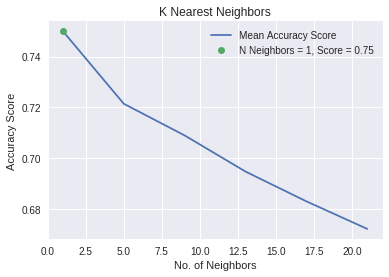

In [13]:
parameters = {'n_neighbors': np.arange(1, 22, 4)}
clf = GridSearchCV(KNeighborsClassifier(), parameters)

clf.fit(df_sample.iloc[:, :-1], df_sample.iloc[:, -1])
result = pd.DataFrame.from_dict(clf.cv_results_)

x, y = clf.best_params_['n_neighbors'], clf.best_score_
text = 'N Neighbors = {}, Score = {}'.format(x, y)

plt.figure()
plt.title('K Nearest Neighbors')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0.6, 0.81, 0.02))

plt.plot(result.param_n_neighbors, result.mean_test_score, label='Mean Accuracy Score')
plt.plot(x, y, 'o', label=text)

plt.legend()
plt.show()

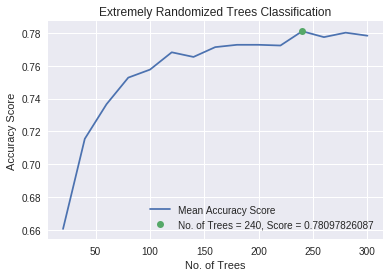

In [14]:
parameters = {'n_estimators': np.arange(20, 310, 20)}
clf = GridSearchCV(ExtraTreesClassifier(), parameters)

clf.fit(df_sample.iloc[:, :-1], df_sample.iloc[:, -1])
result = pd.DataFrame.from_dict(clf.cv_results_)

x, y = clf.best_params_['n_estimators'], clf.best_score_
text = 'No. of Trees = {}, Score = {}'.format(x, y)

plt.figure()
plt.title('Extremely Randomized Trees Classification')
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0.6, 0.81, 0.02))

plt.plot(result.param_n_estimators, result.mean_test_score, label='Mean Accuracy Score')
plt.plot(x, y, 'o', label=text)

plt.legend()
plt.show()

In [15]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
!ls

clf.pkl   datalab			drive	    kaggle.json
data.csv  devanagari-character-set.zip	Images.zip


In [0]:
!cp -i clf.pkl drive

In [0]:
from sklearn.externals import joblib

In [0]:
clf = joblib.load('drive/clf.pkl')

In [0]:
import zipfile

In [13]:
!ls

data.csv  datalab  devanagari-character-set.zip  drive	Images.zip  kaggle.json


In [0]:
zip_=zipfile.ZipFile('Images.zip')

In [0]:
imgfile = zip.open('Images/character_01_ka/1382.png')

In [0]:
#!pip install pygame
import io, pygame

In [0]:
bytes_io = io.BytesIO(imgfile)

img = pygame.image.load(bytes_io)

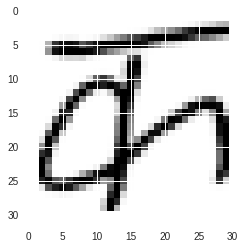

In [46]:
import matplotlib.image as mpimg
img=mpimg.imread(imgfile)
imgplot = plt.imshow(img)
plt.show()

In [0]:
d = pd.read_csv('data.csv')

In [59]:
d.columns

Index([u'pixel_0000', u'pixel_0001', u'pixel_0002', u'pixel_0003',
       u'pixel_0004', u'pixel_0005', u'pixel_0006', u'pixel_0007',
       u'pixel_0008', u'pixel_0009',
       ...
       u'pixel_1015', u'pixel_1016', u'pixel_1017', u'pixel_1018',
       u'pixel_1019', u'pixel_1020', u'pixel_1021', u'pixel_1022',
       u'pixel_1023', u'character'],
      dtype='object', length=1025)

In [65]:
clf.predict(d.ix[1382][:-1].values.reshape(1,-1))

array([13], dtype=uint8)

In [71]:
from tqdm import trange
k = []
for i in trange(1300):
  k.append(clf.predict(d.ix[i][:-1].values.reshape(1,-1)))

100%|██████████| 1300/1300 [00:18<00:00, 69.24it/s]


In [79]:
p= 0
for i in trange(len(k)):
  if k[i] == np.array([0]):
    p+=1

100%|██████████| 1300/1300 [00:00<00:00, 74263.78it/s]


In [99]:
print('The percentage of correct results : {} %').format((p/len(k))*100)

The percentage of correct results : 87.4615384615 %
